# Temperature Forecast Project using ML
### Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

#### Attribute Information:
For more information, read [Cho et al, 2020].                                                                                  
1. station - used weather station number: 1 to 25                                                                    
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')                                                    
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6                   
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9                     
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5                     
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100                           
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5      
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6       
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9                            
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4                          
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97                  
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97              
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98                
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97          
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7            
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6          
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8             
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7           
19. lat - Latitude (Â°): 37.456 to 37.645                                                                               
20. lon - Longitude (Â°): 126.826 to 127.135                                                                               
21. DEM - Elevation (m): 12.4 to 212.3                                                                                     
22. Slope - Slope (Â°): 0.1 to 5.2                                                                                   
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9                                        
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9                                                    
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T                                                   

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.



In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data
df = pd.read_csv('temperature.csv')
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

Our dataset contains 7752 rows and 25 columns. we will build two models to predict the next day's minimum and maximum temperature. Next_Tmax column represents next day maximum temperature and Next_Tmin column represents next day maximum temperature. Both contain continuous data. we have 23 features.

### Exploratory Data Analysis (EDA)

In [3]:
# checking data shape
df.shape

(7752, 25)

Dataset has 7752 rows and 25 columns

In [4]:
# checking data type
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [5]:
# changing Date column data type
df['Date'] = df['Date'].astype('datetime64')

In [6]:
df.head(5)

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [7]:
# checking duplicate data
print('Duplicate rows =',df.duplicated().sum())
if df.duplicated().sum()!=0:
    print(df.duplicated().sum(),'duplicate rows present in the dataset.')
else:
    print('No duplicate rows present in the dataset.')    

Duplicate rows = 0
No duplicate rows present in the dataset.


In [8]:
# value count and missing values
for i in df.columns:
    print('\nTotal unique values in',i,'column -',df[i].nunique(),'\n')
    print(df[i].value_counts())
    print('\nMissing values present in',i,'column -',df[i].isnull().sum())
    print('missing values percentage',((df[i].isnull().sum()/df.shape[0])*100).round(2),'%')
    print('_'*50)


Total unique values in station column - 25 

1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64

Missing values present in station column - 2
missing values percentage 0.03 %
__________________________________________________

Total unique values in Date column - 310 

2013-06-30    25
2016-07-18    25
2016-07-25    25
2016-07-24    25
2016-07-23    25
              ..
2014-09-08    25
2014-08-08    25
2014-07-08    25
2014-06-08    25
2017-08-30    25
Name: Date, Length: 310, dtype: int64

Missing values present in Date column - 2
missing values percentage 0.03 %
__________________________________________________

Total unique values in Present_Tmax column - 167 

31.4    112
29.4    111
29.1    108
29.7    107


In [9]:
# checking null values
df[df['station'].isnull()]

station Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
7750      NaN  NaT          20.0          11.3    19.794666    58.936283   
7751      NaN  NaT          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  ...  \
7750         17.624954         14.272646   2.882580  -13.603212  ...   
7751         38.542255         29.619342  21.857621  213.414006  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM     Slope  \
7750    0.000000    0.000000    0.000000  37.4562  126.826   12.370  0.098475   
7751   21.621661   15.841235   16.655469  37.6450  127.135  212.335  5.178230   

      Solar radiation  Next_Tmax  Next_Tmin  
7750      4329.520508       17.4       11.3  
7751      5992.895996       38.9       29.8  

[2 rows x 25 columns]

In [10]:
# checking null values
df[df['Present_Tmax'].isnull()].head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
225      1.0 2013-09-07           NaN           NaN    70.051193    99.668961   
271     22.0 2013-10-07           NaN           NaN    72.196007    95.168205   
300      1.0 2013-12-07           NaN           NaN    95.027298    99.209839   
450      1.0 2013-07-18           NaN           NaN    60.891193    94.747780   
464     15.0 2013-07-18           NaN           NaN    52.795406    83.902847   

     LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS   LDAPS_LH  ...  \
225         27.872808         22.907420  11.017837  44.002020  ...   
271         28.097980         24.510159   8.374849  38.782242  ...   
300         24.078120         21.866817   8.543768   9.371270  ...   
450         29.195536         23.236973  10.881031  79.349271  ...   
464         31.480089         25.607262   8.995135  26.022306  ...   

     LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
225    0.036680    0.000000    0.000000  37.6046  126.991  212.3350  2.7850   
271    0.007261    0.000000    0.000000  37.5102  127.086   21.9668  0.1332   
300    5.055660    1.347418    0.980052  37.6046  126.991  212.3350  2.7850   
450    0.000000    0.000000    0.057358  37.6046  126.991  212.3350  2.7850   
464    0.000000    0.000000    0.008702  37.5507  126.937   30.0464  0.8552   

     Solar radiation  Next_Tmax  Next_Tmin  
225      5925.883789       23.4       22.0  
271      5772.487305       26.1       24.1  
300      5893.265625       23.2       20.5  
450      5812.293457       27.6       21.8  
464      5681.875000       30.7       23.4  

[5 rows x 25 columns]

In [11]:
# checking null values
df[df['LDAPS_RHmin'].isnull()].head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
1025      1.0 2013-10-08          27.1          24.5          NaN   
1026      2.0 2013-10-08          29.7          25.4          NaN   
1027      3.0 2013-10-08          29.1          25.9          NaN   
1028      4.0 2013-10-08          30.8          27.3          NaN   
1029      5.0 2013-10-08          29.7          25.7          NaN   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
1025          NaN               NaN               NaN       NaN       NaN   
1026          NaN               NaN               NaN       NaN       NaN   
1027          NaN               NaN               NaN       NaN       NaN   
1028          NaN               NaN               NaN       NaN       NaN   
1029          NaN               NaN               NaN       NaN       NaN   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
1025  ...         NaN         NaN         NaN  37.6046  126.991  212.3350   
1026  ...         NaN         NaN         NaN  37.6046  127.032   44.7624   
1027  ...         NaN         NaN         NaN  37.5776  127.058   33.3068   
1028  ...         NaN         NaN         NaN  37.6450  127.022   45.7160   
1029  ...         NaN         NaN         NaN  37.5507  127.135   35.0380   

       Slope  Solar radiation  Next_Tmax  Next_Tmin  
1025  2.7850      5304.412598       31.4       22.3  
1026  0.5141      5162.595703       34.3       23.2  
1027  0.2661      5157.235352       33.9       24.0  
1028  2.5348      5148.043945       34.9       24.5  
1029  0.5055      5147.667969       32.9       23.3  

[5 rows x 25 columns]

In [12]:
# checking null values
df[df['Next_Tmin'].isnull()].head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
831       7.0 2013-02-08          29.6          25.8    76.202255   
856       7.0 2013-03-08           NaN           NaN    69.476059   
1073     24.0 2013-11-08          34.2          25.1    50.618851   
2465     16.0 2014-05-08          28.8          23.1    71.442566   
3696     22.0 2015-07-23          30.4          23.4    81.568771   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
831     94.058517         28.842727         26.442801  7.980686   87.715882   
856     93.672600         30.491629         25.081388  6.282423  124.191446   
1073    89.166397         33.414349         27.475249  6.084058   48.521008   
2465    90.695419         26.273760         23.419080  3.787889   41.739802   
3696    93.973579         26.724457         24.984435  5.779299   58.456456   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  \
831   ...    0.000000    0.000000    0.000000  37.5776  126.838  12.3700   
856   ...    0.000000    0.000000    0.000000  37.5776  126.838  12.3700   
1073  ...    0.000000    0.000000    0.000000  37.5237  126.909  17.2956   
2465  ...    0.010050    0.681801    0.000000  37.4697  126.995  82.2912   
3696  ...    0.711069    0.016985    0.064332  37.5102  127.086  21.9668   

       Slope  Solar radiation  Next_Tmax  Next_Tmin  
831   0.0985      5357.705566        NaN        NaN  
856   0.0985      5332.515625        NaN        NaN  
1073  0.2223      5109.454102        NaN        NaN  
2465  2.2579      5269.604980        NaN        NaN  
3696  0.1332      5578.788086        NaN        NaN  

[5 rows x 25 columns]

In [13]:
# removing columns
df.drop(columns=['station','Date'],axis=1, inplace=True)

In [14]:
# dropping null values of columns Next_Tmax and LDAPS_RHmin
df.dropna(subset=['Next_Tmin','LDAPS_RHmin'],axis=0,inplace=True)

In [15]:
# filling nan values of Present_Tmax and Present_Tmin using forward fill
for i in ['Present_Tmax','Present_Tmin']:
    df[i].fillna(method='ffill',inplace=True)

In [16]:
# again checking null values
print('Total Null -',df.isnull().sum().sum())

# data loss percentage
print('Data loss after removing null values -',((7752-df.shape[0])/7752)*100,'%')

Total Null - 0
Data loss after removing null values - 1.3157894736842104 %


In [17]:
# reset the indices
df.reset_index(inplace=True,drop=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7650 entries, 0 to 7649
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Present_Tmax      7650 non-null   float64
 1   Present_Tmin      7650 non-null   float64
 2   LDAPS_RHmin       7650 non-null   float64
 3   LDAPS_RHmax       7650 non-null   float64
 4   LDAPS_Tmax_lapse  7650 non-null   float64
 5   LDAPS_Tmin_lapse  7650 non-null   float64
 6   LDAPS_WS          7650 non-null   float64
 7   LDAPS_LH          7650 non-null   float64
 8   LDAPS_CC1         7650 non-null   float64
 9   LDAPS_CC2         7650 non-null   float64
 10  LDAPS_CC3         7650 non-null   float64
 11  LDAPS_CC4         7650 non-null   float64
 12  LDAPS_PPT1        7650 non-null   float64
 13  LDAPS_PPT2        7650 non-null   float64
 14  LDAPS_PPT3        7650 non-null   float64
 15  LDAPS_PPT4        7650 non-null   float64
 16  lat               7650 non-null   float64


After removing NaN we have 7650 rows and 23 columns. 

In [19]:
# statistical description
df.describe().T

count         mean         std          min          25%  \
Present_Tmax      7650.0    29.749124    2.970783    20.000000    27.800000   
Present_Tmin      7650.0    23.198065    2.404722    11.300000    21.600000   
LDAPS_RHmin       7650.0    56.741402   14.654953    19.794666    45.961137   
LDAPS_RHmax       7650.0    88.369140    7.199065    58.936283    84.212961   
LDAPS_Tmax_lapse  7650.0    29.616253    2.946612    17.624954    27.675091   
LDAPS_Tmin_lapse  7650.0    23.511807    2.345402    14.272646    22.088261   
LDAPS_WS          7650.0     7.096739    2.182457     2.882580     5.678962   
LDAPS_LH          7650.0    62.468599   33.720451   -13.603212    37.227417   
LDAPS_CC1         7650.0     0.368482    0.262328     0.000000     0.146551   
LDAPS_CC2         7650.0     0.355797    0.257919     0.000000     0.140619   
LDAPS_CC3         7650.0     0.318133    0.250098     0.000000     0.101682   
LDAPS_CC4         7650.0     0.299092    0.254199     0.000000     0.081476   
LDAPS_PPT1        7650.0     0.591684    1.945778     0.000000     0.000000   
LDAPS_PPT2        7650.0     0.484298    1.761169     0.000000     0.000000   
LDAPS_PPT3        7650.0     0.277121    1.158092     0.000000     0.000000   
LDAPS_PPT4        7650.0     0.269440    1.205851     0.000000     0.000000   
lat               7650.0    37.544755    0.050387    37.456200    37.510200   
lon               7650.0   126.991370    0.079346   126.826000   126.937000   
DEM               7650.0    61.927561   54.332468    12.370000    28.700000   
Slope             7650.0     1.258745    1.371346     0.098475     0.271300   
Solar radiation   7650.0  5344.208488  430.067175  4329.520508  5002.308105   
Next_Tmax         7650.0    30.237464    3.115782    17.400000    28.200000   
Next_Tmin         7650.0    22.910157    2.484957    11.300000    21.300000   

                          50%          75%          max  
Present_Tmax        29.900000    32.000000    37.600000  
Present_Tmin        23.300000    24.800000    29.900000  
LDAPS_RHmin         55.017689    67.154766    98.524734  
LDAPS_RHmax         89.792492    93.743328   100.000153  
LDAPS_Tmax_lapse    29.705437    31.710506    38.542255  
LDAPS_Tmin_lapse    23.758249    25.153721    29.619342  
LDAPS_WS             6.547838     8.030117    21.857621  
LDAPS_LH            56.854134    84.223234   213.414006  
LDAPS_CC1            0.315185     0.573970     0.967277  
LDAPS_CC2            0.311891     0.557436     0.968353  
LDAPS_CC3            0.262414     0.496507     0.983789  
LDAPS_CC4            0.227764     0.499391     0.974710  
LDAPS_PPT1           0.000000     0.052353    23.701544  
LDAPS_PPT2           0.000000     0.017952    21.621661  
LDAPS_PPT3           0.000000     0.007882    15.841235  
LDAPS_PPT4           0.000000     0.000045    16.655469  
lat                 37.550700    37.577600    37.645000  
lon                126.995000   127.042000   127.135000  
DEM                 45.716000    59.832400   212.335000  
Slope                0.618000     1.767800     5.178230  
Solar radiation   5443.858887  5729.980835  5992.895996  
Next_Tmax           30.400000    32.600000    38.900000  
Next_Tmin           23.100000    24.600000    29.800000

### Data visualization

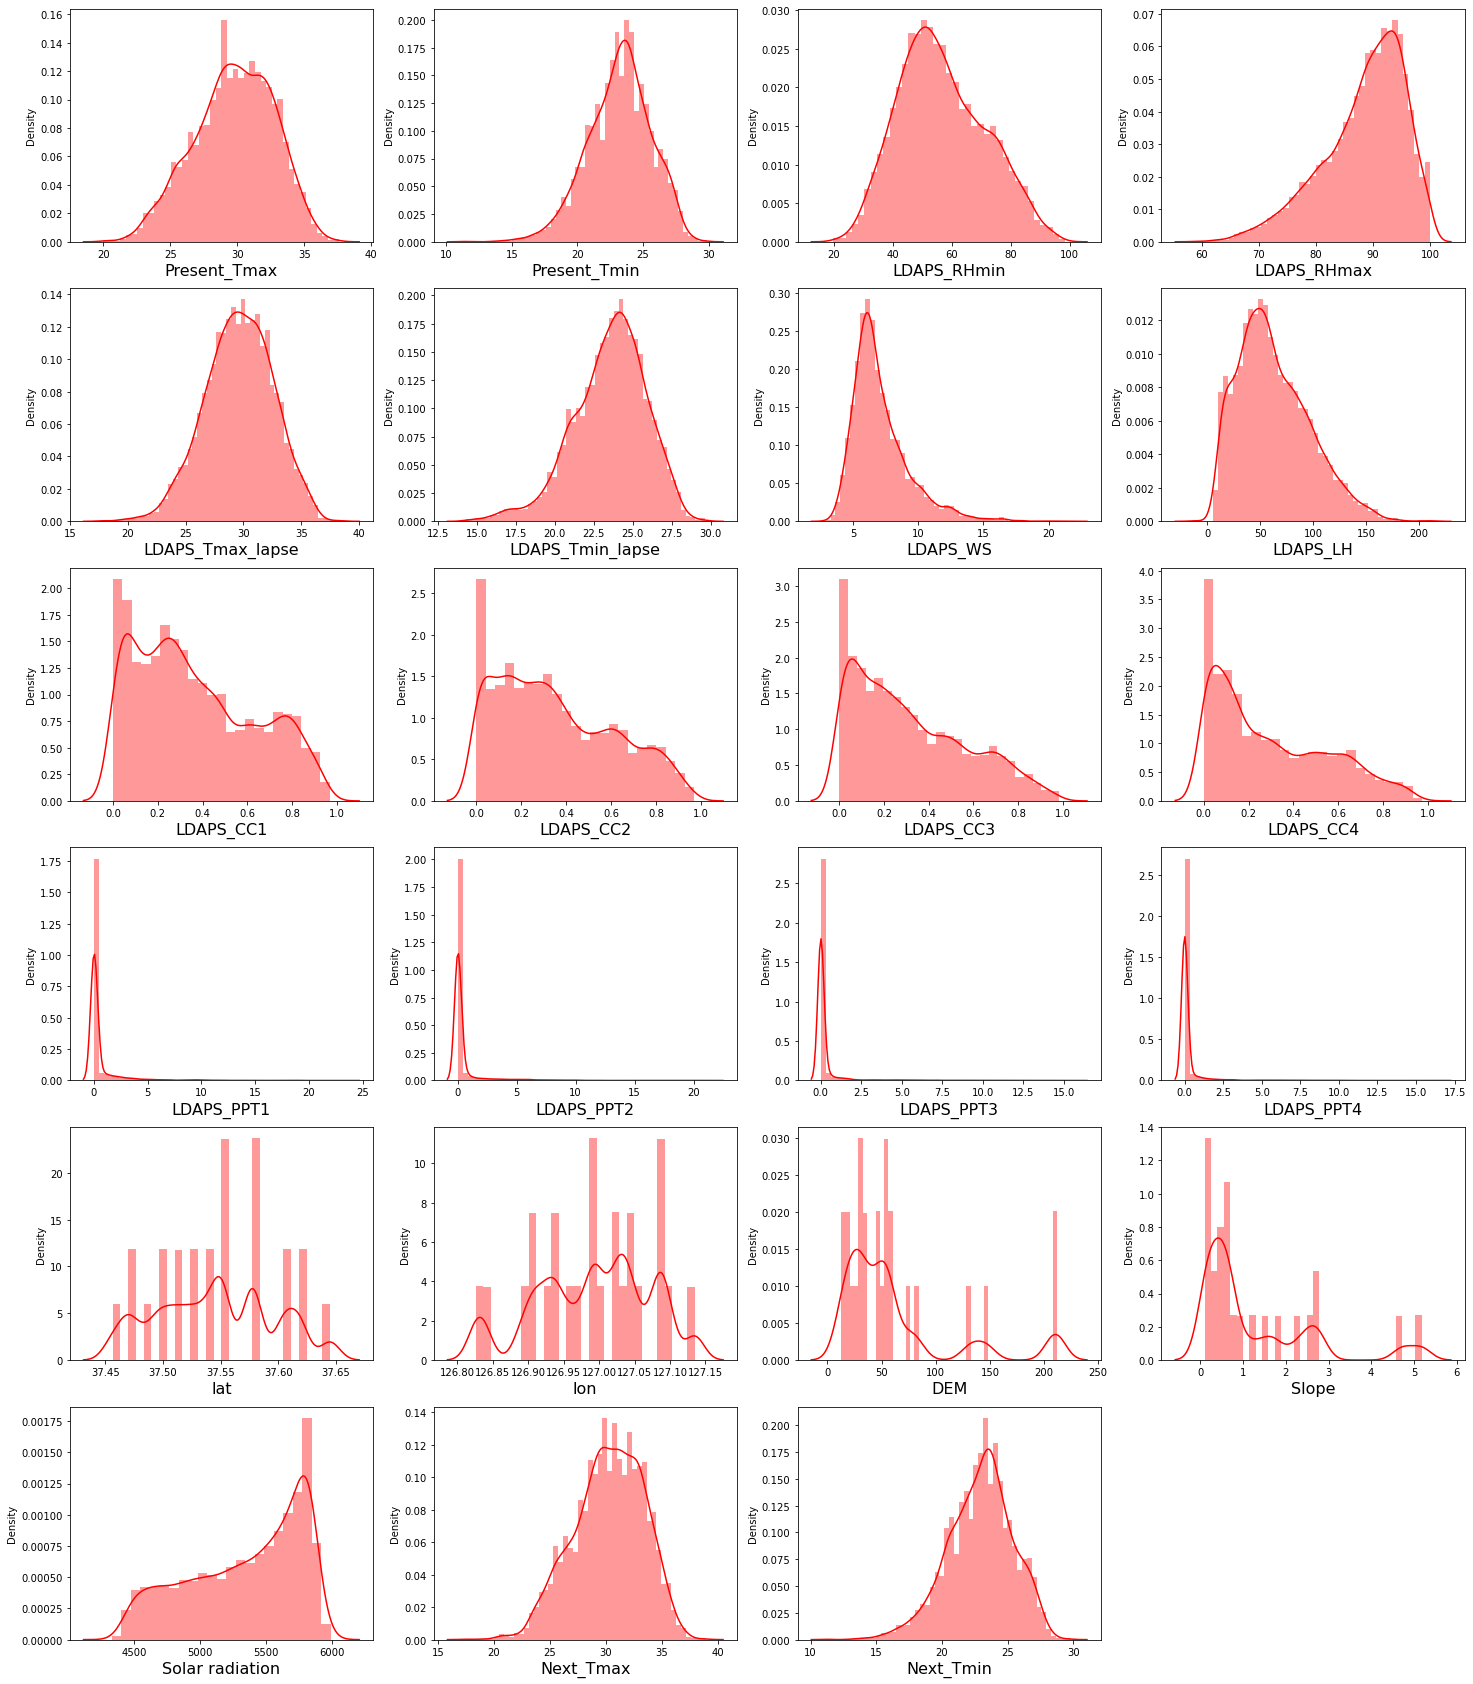

In [20]:
plt.figure(figsize=(25,30))
pn=1
for i in df.columns:
    if pn<=25:
        ax=plt.subplot(6,4,pn)
        sns.distplot(df[i], color='r')
        plt.xlabel(i,fontsize=16)
    pn+=1
plt.show()

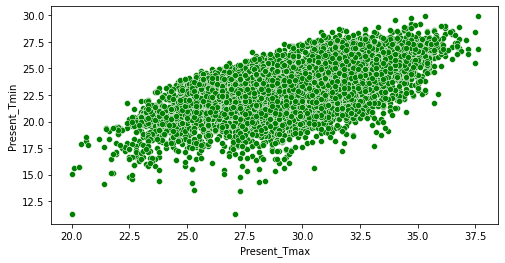

In [21]:
# scatter plot
plt.figure(figsize=(8,4))
sns.scatterplot(x='Present_Tmax', y='Present_Tmin', data=df, color='g')
plt.show()

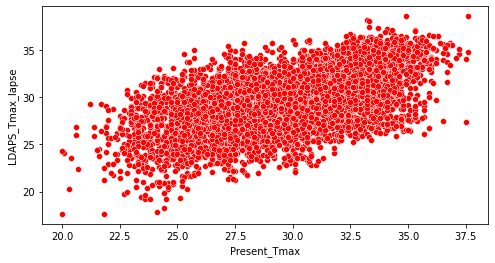

In [22]:
# scatter plot
plt.figure(figsize=(8,4))
sns.scatterplot(x='Present_Tmax', y='LDAPS_Tmax_lapse', data=df, color='r')
plt.show()

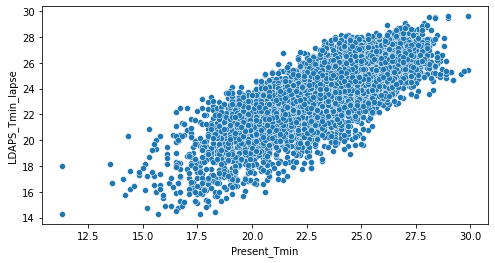

In [23]:
# scatter plot
plt.figure(figsize=(8,4))
sns.scatterplot(x='Present_Tmin', y='LDAPS_Tmin_lapse', data=df)
plt.show()

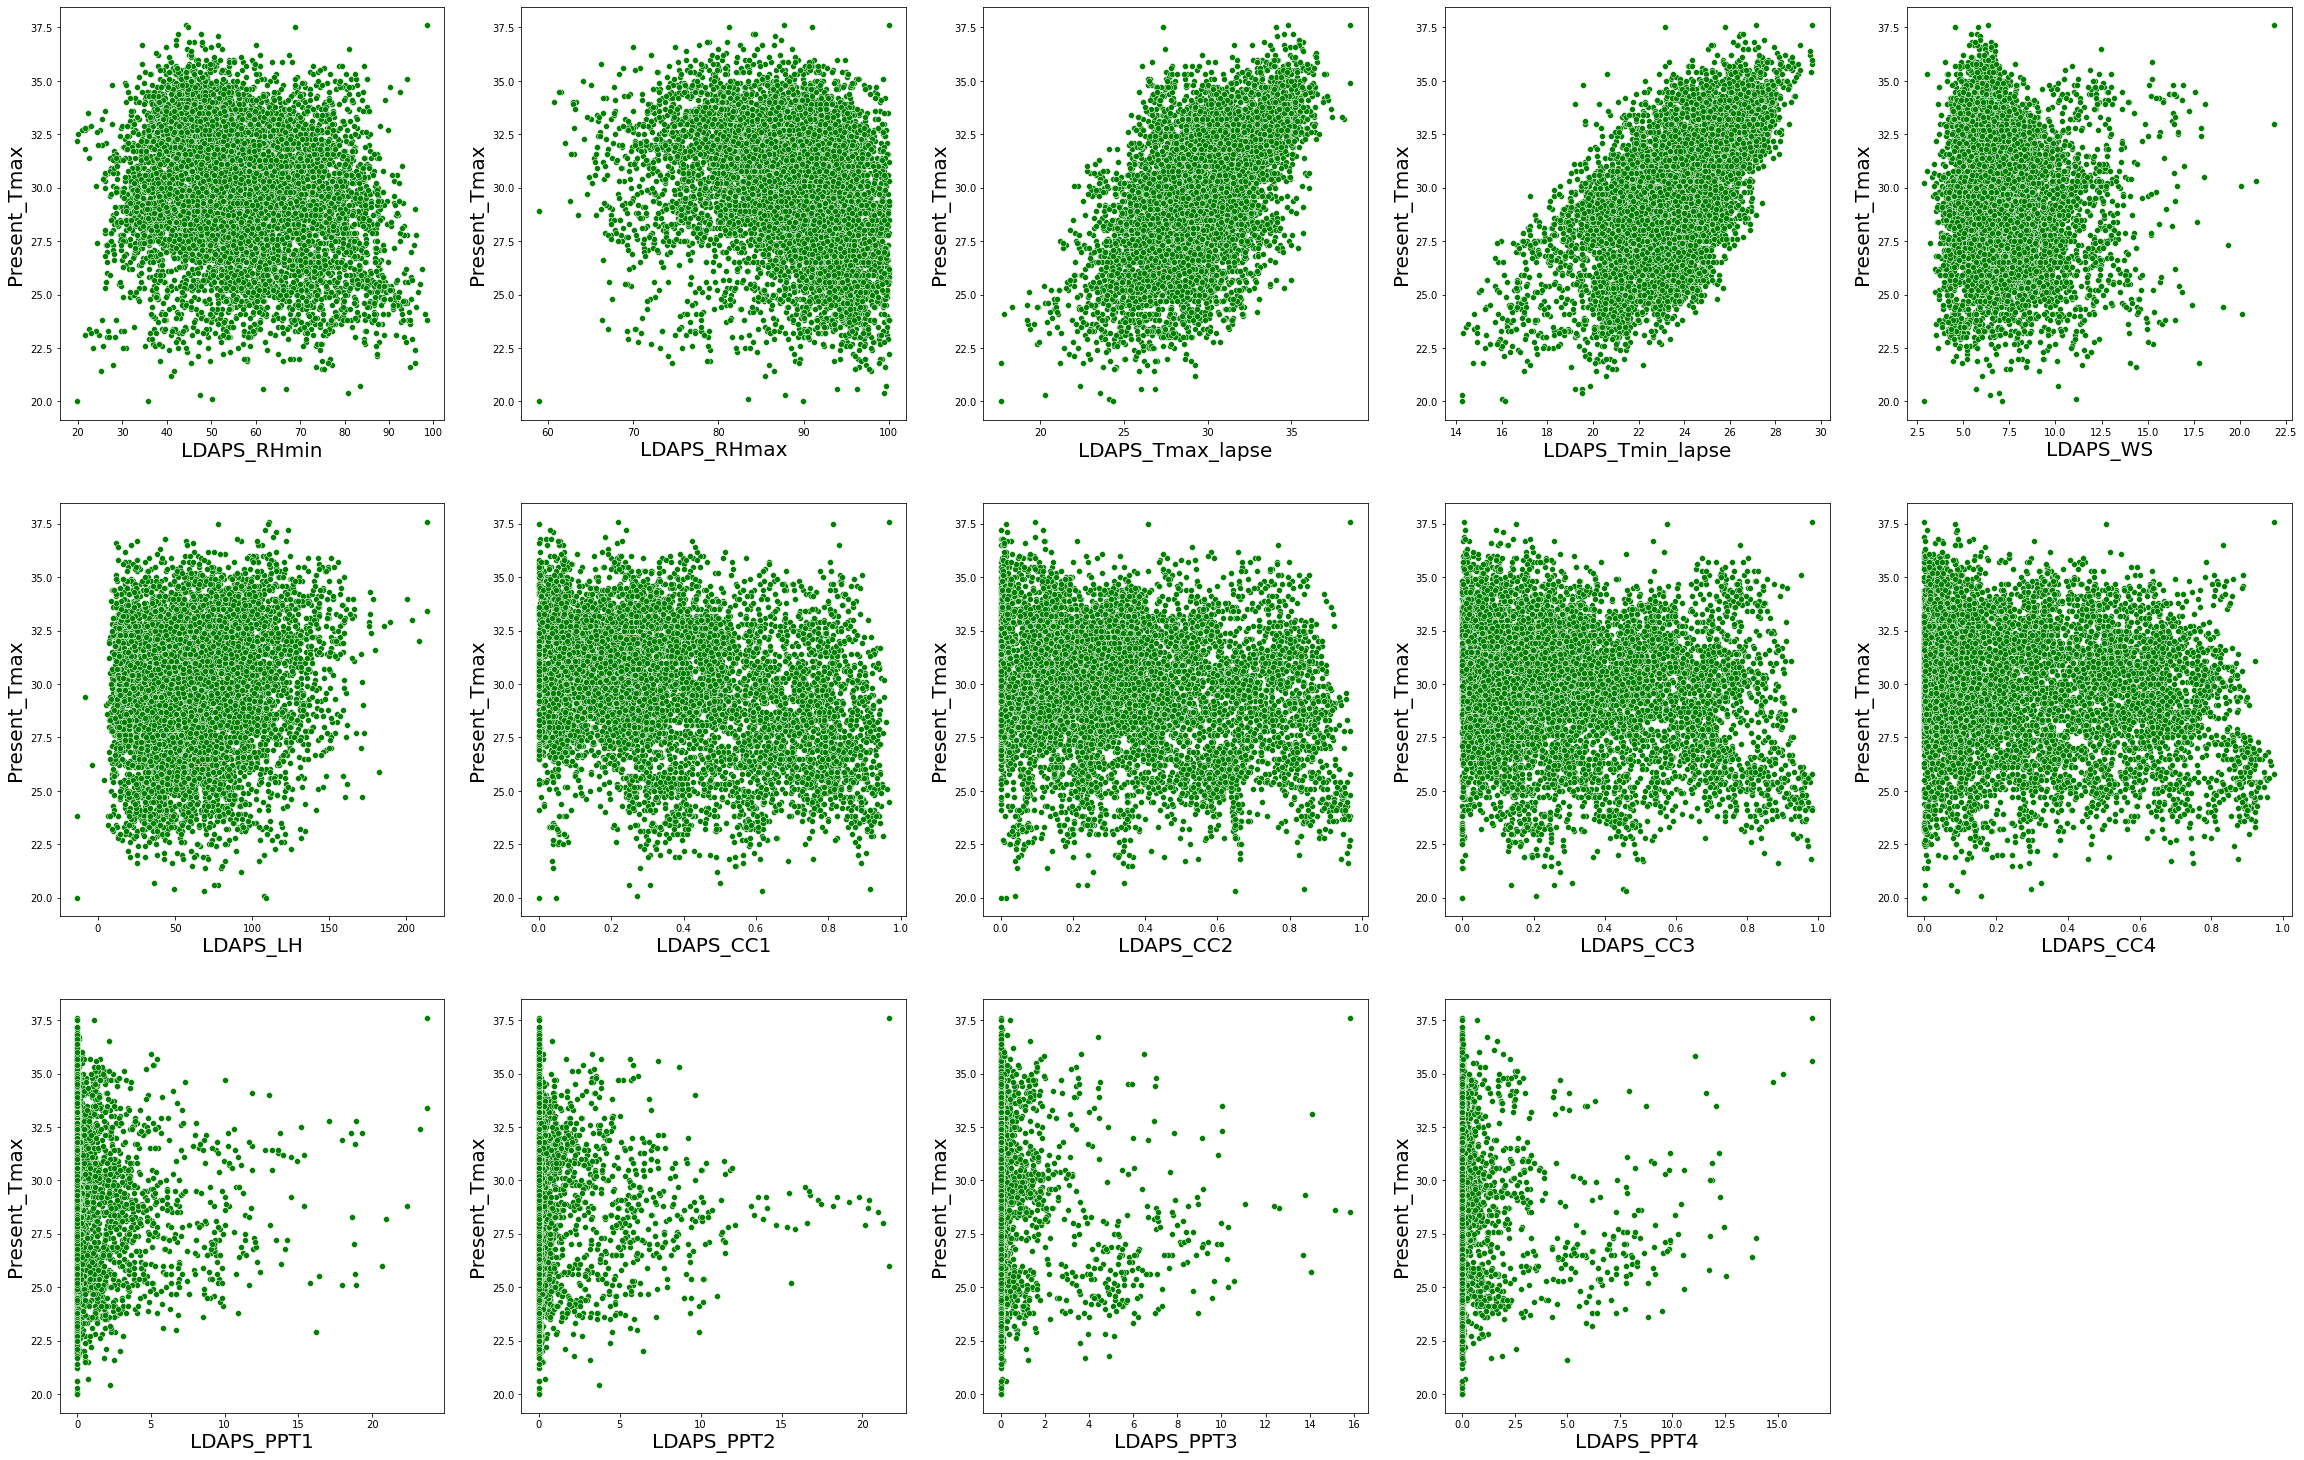

In [24]:
plt.figure(figsize = (40,35))
pn = 1


for i in ['LDAPS_RHmin', 'LDAPS_RHmax','LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH','LDAPS_CC1','LDAPS_CC2',
          'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1','LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']:
    if pn <= 25:
        ax = plt.subplot(4,5 , pn)
        sns.scatterplot(df[i],df['Present_Tmax'],color='green')
        plt.xlabel(i, fontsize = 20)
        plt.ylabel('Present_Tmax', fontsize=20)
        pn +=1
plt.show()

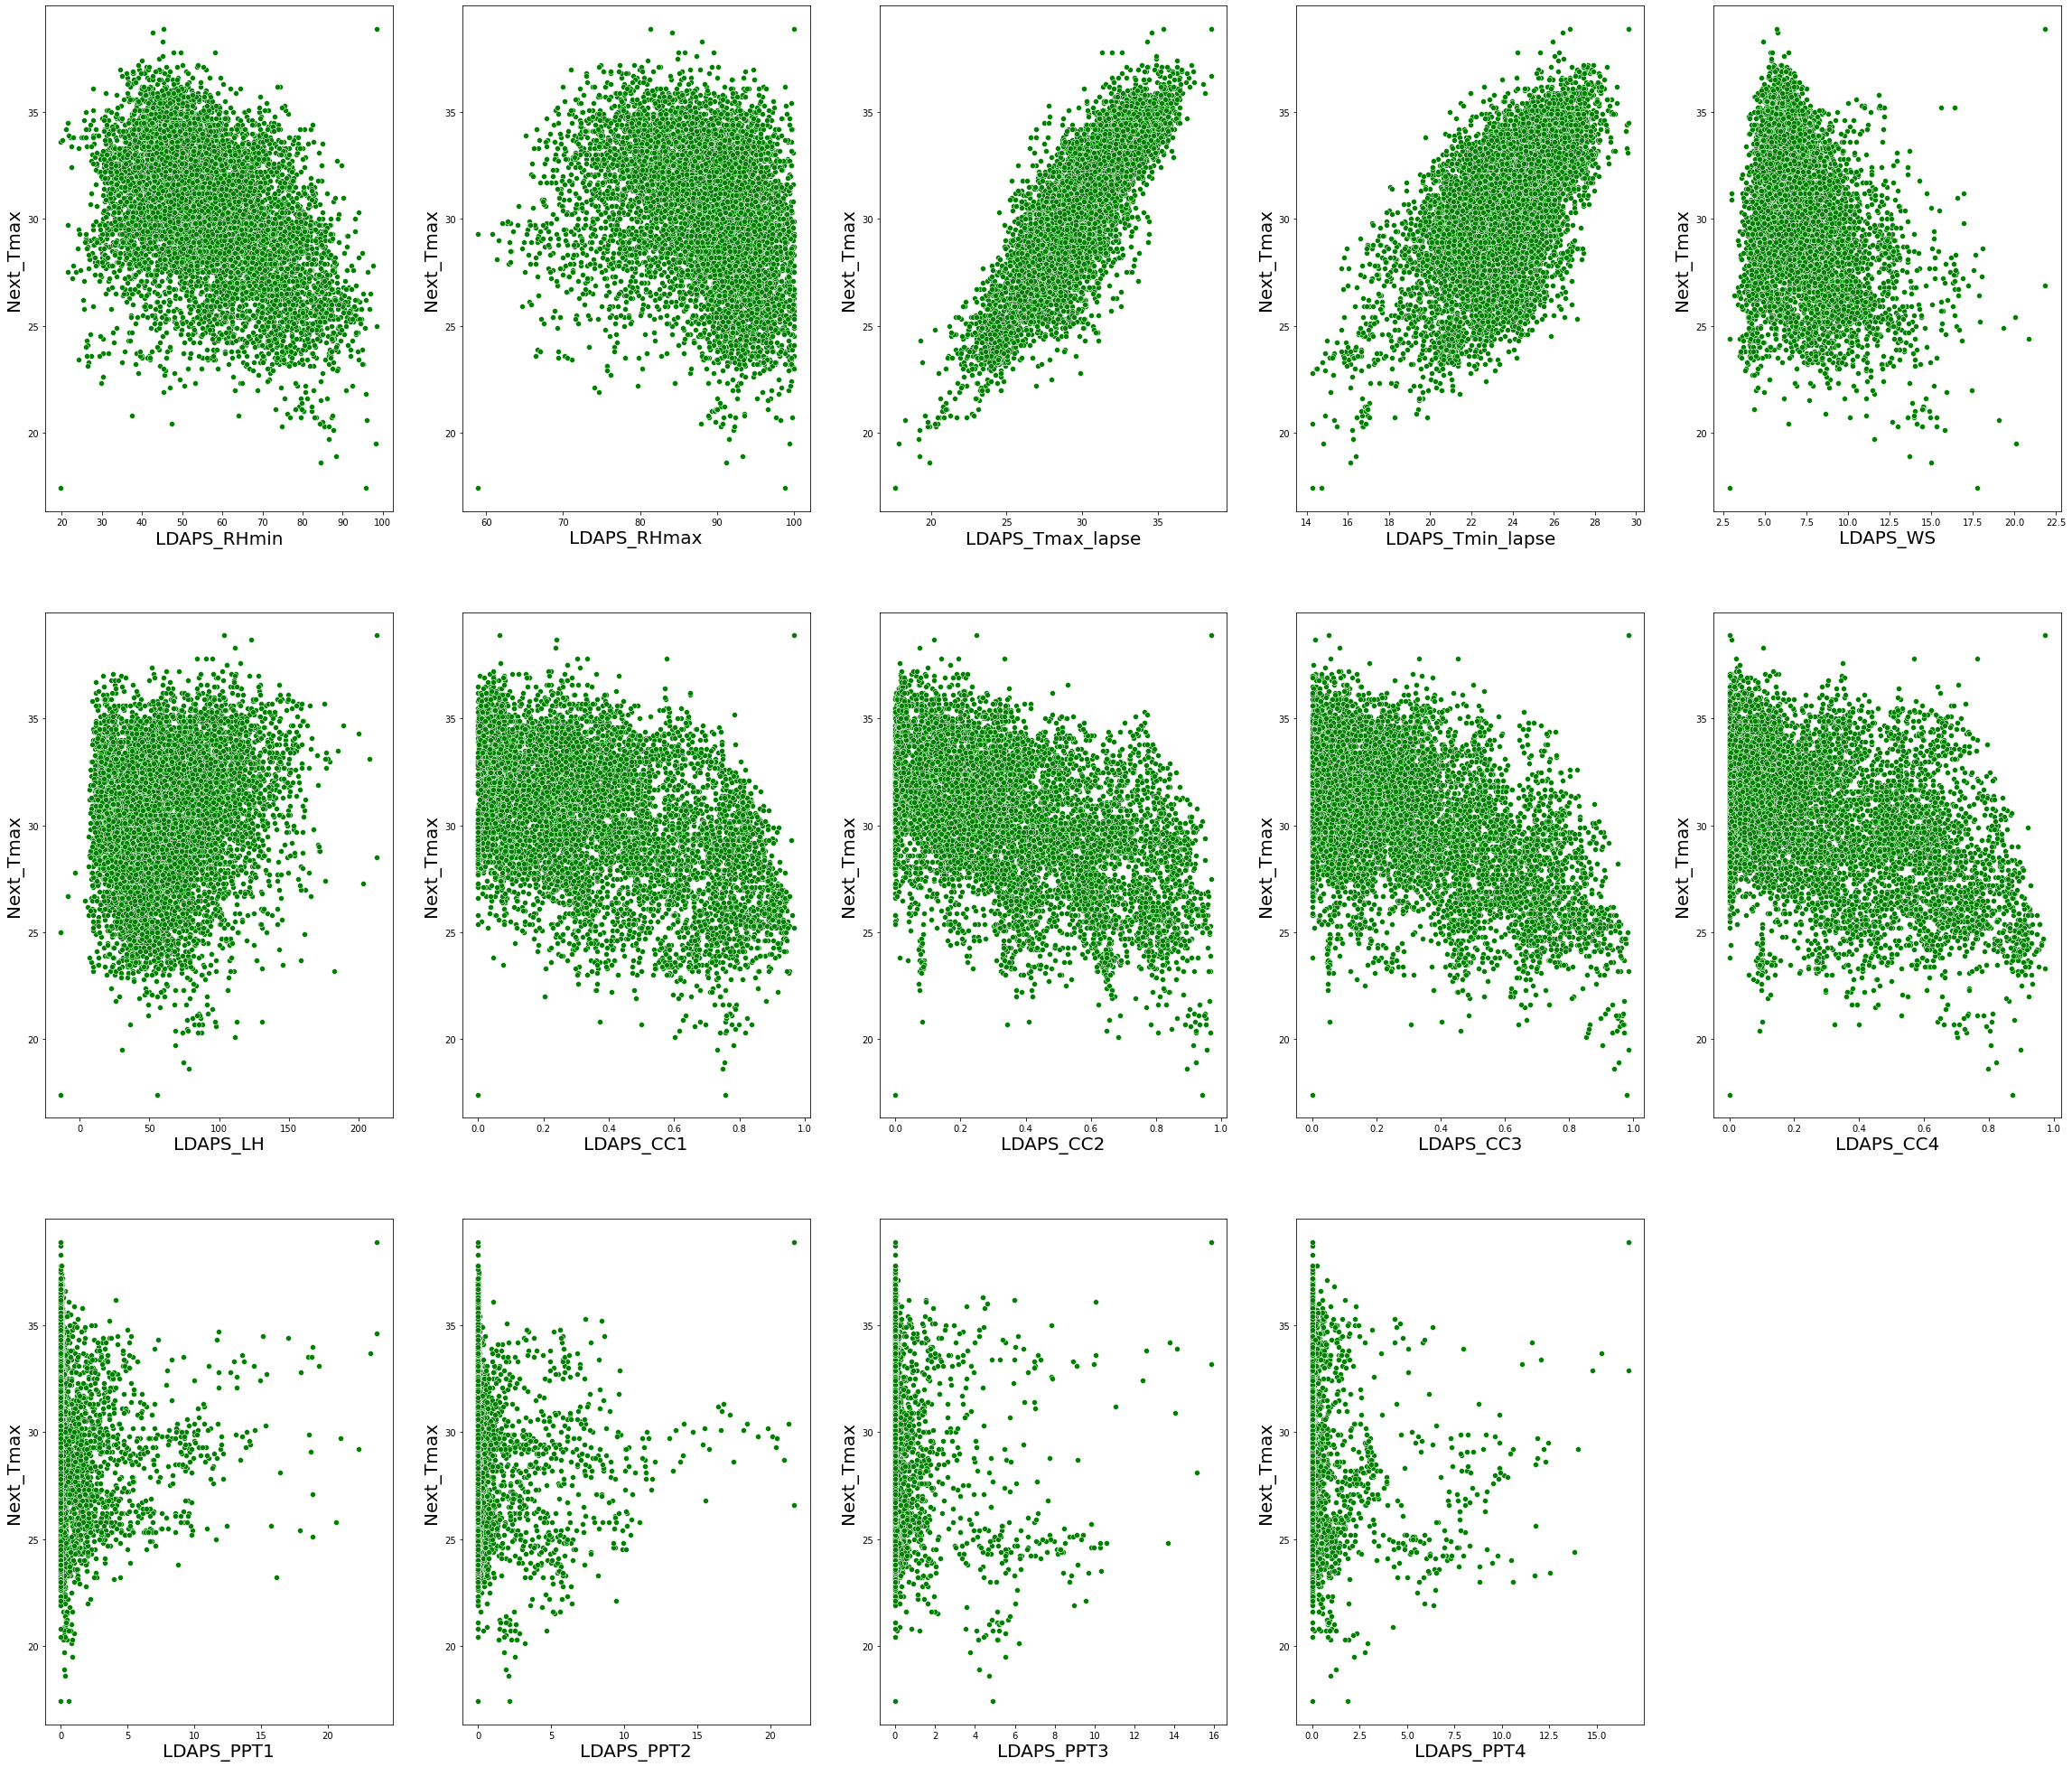

In [25]:
plt.figure(figsize = (40,35))
pn = 1


for i in ['LDAPS_RHmin', 'LDAPS_RHmax','LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH','LDAPS_CC1',
         'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1','LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']:
    if pn <= 25:
        ax = plt.subplot(3, 5 , pn)
        sns.scatterplot(df[i],df['Next_Tmax'],color='green')
        plt.xlabel(i, fontsize = 20)
        plt.ylabel('Next_Tmax', fontsize=20)
        pn +=1
plt.show()

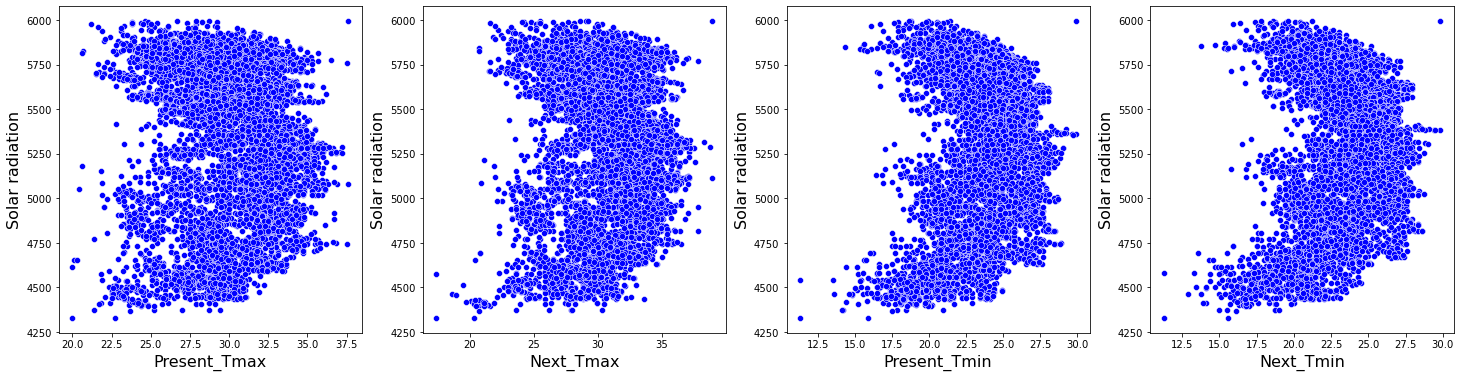

In [26]:
plt.figure(figsize = (25,6))
pn = 1


for i in ['Present_Tmax','Next_Tmax','Present_Tmin','Next_Tmin']:
    if pn <= 25:
        ax = plt.subplot(1, 4 , pn)
        sns.scatterplot(df[i],df['Solar radiation'],color='b')
        plt.xlabel(i, fontsize = 16)
        plt.ylabel('Solar radiation', fontsize=16)
        pn +=1
plt.show()

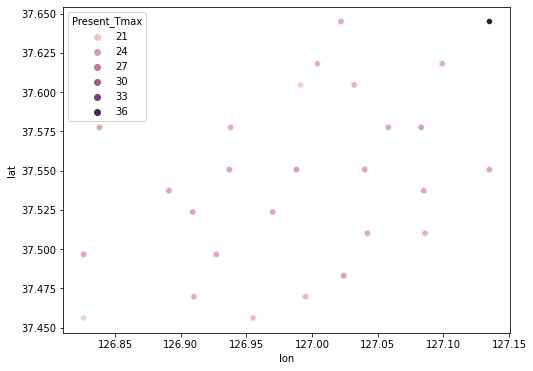

In [27]:
# scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='lon', y='lat',hue='Present_Tmax', data=df)
plt.show()

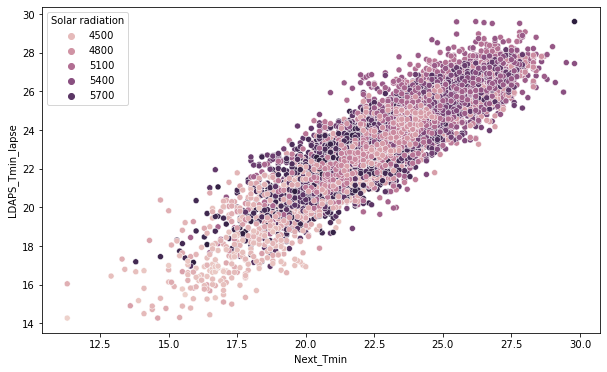

In [28]:
# scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Next_Tmin', y='LDAPS_Tmin_lapse',hue='Solar radiation', data=df)
plt.show()

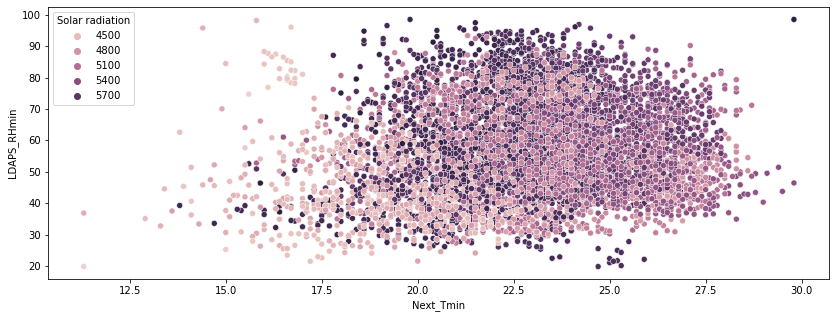

In [29]:
# scatter plot
plt.figure(figsize=(14,5))
sns.scatterplot(x='Next_Tmin', y='LDAPS_RHmin',hue='Solar radiation', data=df)
plt.show()

In [30]:
# correlation
df.corr()

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Present_Tmax          1.000000      0.616160    -0.205451    -0.303105   
Present_Tmin          0.616160      1.000000     0.125941    -0.013501   
LDAPS_RHmin          -0.205451      0.125941     1.000000     0.579379   
LDAPS_RHmax          -0.303105     -0.013501     0.579379     1.000000   
LDAPS_Tmax_lapse      0.574626      0.469216    -0.565001    -0.373283   
LDAPS_Tmin_lapse      0.629636      0.772695     0.088335    -0.114441   
LDAPS_WS             -0.122535     -0.033631     0.293749     0.134659   
LDAPS_LH              0.137072     -0.008057    -0.070208     0.239167   
LDAPS_CC1            -0.315084      0.085854     0.613646     0.436752   
LDAPS_CC2            -0.214976      0.091307     0.745248     0.391555   
LDAPS_CC3            -0.145061     -0.003223     0.689020     0.226687   
LDAPS_CC4            -0.141007     -0.046278     0.513410     0.130238   
LDAPS_PPT1           -0.109217      0.114296     0.262243     0.268129   
LDAPS_PPT2           -0.099615      0.070472     0.391114     0.228397   
LDAPS_PPT3           -0.120894     -0.046418     0.239706     0.133710   
LDAPS_PPT4           -0.097396     -0.060957     0.168198     0.117272   
lat                  -0.052731     -0.079344     0.087031     0.196535   
lon                   0.006216     -0.046255    -0.076575     0.026568   
DEM                  -0.187248     -0.250051     0.103105     0.178460   
Slope                -0.106426     -0.146428     0.124325     0.220633   
Solar radiation      -0.020053      0.061655     0.244177     0.149719   
Next_Tmax             0.611769      0.464896    -0.442958    -0.286478   
Next_Tmin             0.622341      0.796910     0.095830    -0.072490   

                  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
Present_Tmax              0.574626          0.629636 -0.122535  0.137072   
Present_Tmin              0.469216          0.772695 -0.033631 -0.008057   
LDAPS_RHmin              -0.565001          0.088335  0.293749 -0.070208   
LDAPS_RHmax              -0.373283         -0.114441  0.134659  0.239167   
LDAPS_Tmax_lapse          1.000000          0.654396 -0.311024  0.047324   
LDAPS_Tmin_lapse          0.654396          1.000000 -0.129430 -0.135288   
LDAPS_WS                 -0.311024         -0.129430  1.000000  0.007742   
LDAPS_LH                  0.047324         -0.135288  0.007742  1.000000   
LDAPS_CC1                -0.438065          0.010476  0.288399 -0.146508   
LDAPS_CC2                -0.523313          0.047338  0.260106 -0.263239   
LDAPS_CC3                -0.540854         -0.044118  0.241179 -0.244842   
LDAPS_CC4                -0.428611         -0.080102  0.220299 -0.171527   
LDAPS_PPT1               -0.110433          0.038281  0.151926 -0.011859   
LDAPS_PPT2               -0.241390          0.001476  0.191558 -0.076847   
LDAPS_PPT3               -0.186538         -0.087536  0.158129  0.016889   
LDAPS_PPT4               -0.159164         -0.093728  0.142287  0.020690   
lat                      -0.042455         -0.097249  0.036201  0.133464   
lon                       0.092245         -0.025276 -0.060976  0.025764   
DEM                      -0.179680         -0.196034  0.191889  0.057025   
Slope                    -0.162222         -0.186024  0.171882  0.088840   
Solar radiation           0.048134          0.159781  0.123072 -0.045800   
Next_Tmax                 0.836144          0.593195 -0.346592  0.159324   
Next_Tmin                 0.591535          0.886964 -0.097390 -0.055895   

                  LDAPS_CC1  LDAPS_CC2  ...  LDAPS_PPT2  LDAPS_PPT3  \
Present_Tmax      -0.315084  -0.214976  ...   -0.099615   -0.120894   
Present_Tmin       0.085854   0.091307  ...    0.070472   -0.046418   
LDAPS_RHmin        0.613646   0.745248  ...    0.391114    0.239706   
LDAPS_RHmax        0.436752   0.391555  ...    0.228397    0.133710   
LDAPS_Tmax_lapse  -0.438065  -0.523313  ...   -0.241390   -0.

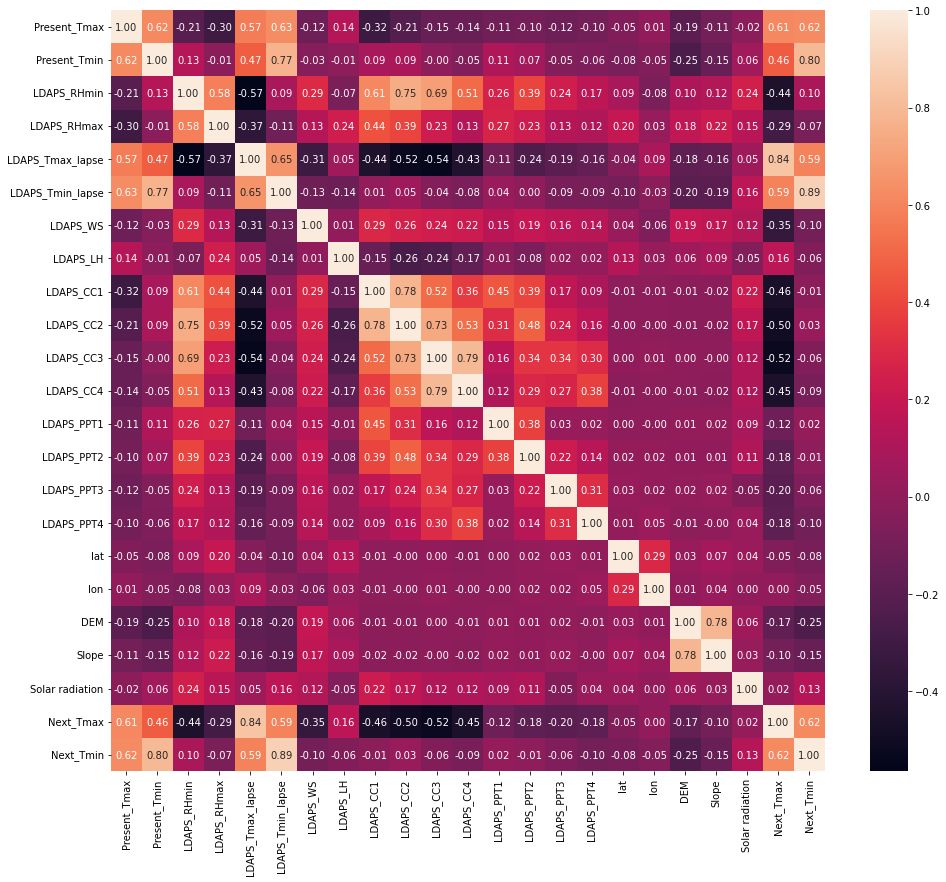

In [31]:
# heatmap
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

In [32]:
# separating target variable and features
x = df.drop(columns=['Next_Tmax','Next_Tmin'])            # features
y1= df['Next_Tmax']                                      # target variable
y2= df['Next_Tmin']                                     # target variable

In [33]:
# checking skewness 
x.skew()

Present_Tmax       -0.257090
Present_Tmin       -0.363464
LDAPS_RHmin         0.301522
LDAPS_RHmax        -0.849938
LDAPS_Tmax_lapse   -0.226330
LDAPS_Tmin_lapse   -0.577813
LDAPS_WS            1.573788
LDAPS_LH            0.669777
LDAPS_CC1           0.458344
LDAPS_CC2           0.472936
LDAPS_CC3           0.639130
LDAPS_CC4           0.663051
LDAPS_PPT1          5.372972
LDAPS_PPT2          5.754835
LDAPS_PPT3          6.438016
LDAPS_PPT4          6.800598
lat                 0.086583
lon                -0.286571
DEM                 1.721031
Slope               1.560525
Solar radiation    -0.523938
dtype: float64

In [34]:
# separating skewed columns
skew_col = []
non_skew = []
for i in x.columns:
    if x[i].skew()>0.5 or x[i].skew()<(-0.5):
        skew_col.append(i)
    else:
        non_skew.append(i)
print('skewed columns',skew_col,'\n\nNon skewed column-',non_skew)

skewed columns ['LDAPS_RHmax', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 'Solar radiation'] 

Non skewed column- ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_Tmax_lapse', 'LDAPS_CC1', 'LDAPS_CC2', 'lat', 'lon']


In [35]:
# reducing skewness
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
x[skew_col]= pt.fit_transform(x[skew_col])

x.skew()

Present_Tmax       -0.257090
Present_Tmin       -0.363464
LDAPS_RHmin         0.301522
LDAPS_RHmax        -0.119440
LDAPS_Tmax_lapse   -0.226330
LDAPS_Tmin_lapse   -0.020381
LDAPS_WS            0.004309
LDAPS_LH            0.055335
LDAPS_CC1           0.458344
LDAPS_CC2           0.472936
LDAPS_CC3           0.090602
LDAPS_CC4           0.130073
LDAPS_PPT1          1.453979
LDAPS_PPT2          1.636341
LDAPS_PPT3          1.814515
LDAPS_PPT4          2.043490
lat                 0.086583
lon                -0.286571
DEM                 0.039636
Slope               0.233811
Solar radiation    -0.182088
dtype: float64

In [36]:
# features scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x[non_skew] = scaler.fit_transform(x[non_skew])
x

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0        -0.353170     -0.747772     0.103336     0.270234         -0.523399   
1         0.724057     -0.664596    -0.305582     0.183616          0.079566   
2         0.623067      0.042392    -0.549401    -0.770442          0.161226   
3         0.757720      0.083980     0.102251     1.308626          0.029994   
4         0.555740     -0.539834    -0.038713     0.109154         -0.170485   
...            ...           ...          ...          ...               ...   
7645     -2.170992     -2.536037    -2.047229    -1.320704         -1.107844   
7646     -2.170992     -2.286511    -2.231526    -1.463265         -0.884484   
7647     -2.204655     -2.411274    -2.307111    -1.467706         -0.569076   
7648     -3.281883     -4.948115    -2.521274    -2.446338         -4.069787   
7649      2.642869      2.787171     2.851327     2.131606          3.029441   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  ...  \
0            -0.311225  0.096512  0.311390  -0.512881  -0.588986  ...   
1             0.143314 -0.619923 -0.208061  -0.545054  -0.403352  ...   
2             0.392254 -0.310226 -1.366512  -0.606677  -0.381258  ...   
3            -0.173944 -0.650998  0.205737  -0.579883  -0.503269  ...   
4            -0.103706 -0.588289  1.296041  -0.827548  -0.410238  ...   
...                ...       ...       ...        ...        ...  ...   
7645         -1.823279 -0.303261  0.383989  -1.290253  -1.065371  ...   
7646         -1.835643 -0.059959 -0.358685  -1.267991  -1.088917  ...   
7647         -1.896642  0.340024 -1.962558  -1.218127  -1.147442  ...   
7648         -2.880082 -4.110734 -7.417832  -1.404751  -1.379579  ...   
7649          3.291139  3.015962  3.434674   2.282768   2.375147  ...   

      LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat  \
0     -0.579096   -0.559943   -0.521442   -0.494521   -0.446947  1.187782   
1     -0.597837   -0.559943   -0.521442   -0.494521   -0.446947  1.187782   
2     -0.514588   -0.559943   -0.521442   -0.494521   -0.446947  0.651894   
3     -0.559797   -0.559943   -0.521442   -0.494521   -0.446947  1.989629   
4     -0.360677   -0.559943   -0.521442   -0.494521   -0.446947  0.117990   
...         ...         ...         ...         ...         ...       ...   
7645  -1.473227   -0.559943   -0.521442   -0.494521   -0.446947 -0.149954   
7646  -1.473227   -0.559943   -0.521442   -0.494521   -0.446947 -0.417898   
7647  -1.466880   -0.559943   -0.521442   -0.494521   -0.446947 -0.417898   
7648  -1.473227   -0.559943   -0.521442   -0.494521   -0.446947 -1.757618   
7649   1.885498    2.191650    2.373831    2.554292    2.685472  1.989629   

           lon       DEM     Slope  Solar radiation  
0    -0.004664  1.833587  1.312886         1.848356  
1     0.512091  0.054996 -0.387052         1.395301  
2     0.839790 -0.365591 -0.950640         1.375079  
3     0.386053  0.083897  1.233918         1.352022  
4     1.810282 -0.291449 -0.403441         1.361062  
...        ...       ...       ...              ...  
7645 -1.265043 -1.579463 -1.281720        -1.749888  
7646 -1.038175 -1.401902 -1.074353        -1.755783  
7647 -0.269344 -1.194324 -0.936528        -1.740250  
7648 -2.084290 -1.986653 -1.478395        -1.879374  
7649  1.810282  1.833587  1.741473         1.848356  

[7650 rows x 21 columns]

In [37]:
# checking variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features']=x.columns
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

Features  vif values
0       Present_Tmax    2.835019
1       Present_Tmin    3.163179
2        LDAPS_RHmin    6.407571
3        LDAPS_RHmax    2.601616
4   LDAPS_Tmax_lapse    6.927464
5   LDAPS_Tmin_lapse    6.811655
6           LDAPS_WS    1.255625
7           LDAPS_LH    1.469531
8          LDAPS_CC1    5.105256
9          LDAPS_CC2    6.060619
10         LDAPS_CC3    5.053682
11         LDAPS_CC4    3.041276
12        LDAPS_PPT1    2.619908
13        LDAPS_PPT2    2.378984
14        LDAPS_PPT3    1.786416
15        LDAPS_PPT4    1.824871
16               lat    1.231267
17               lon    1.223399
18               DEM    2.867836
19             Slope    2.728911
20   Solar radiation    1.237393

#### Models

In [38]:
# importing required libraries
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [39]:
# creating lists of models
LR = LinearRegression()
RFR = RandomForestRegressor()
DTR = DecisionTreeRegressor()
GBR = GradientBoostingRegressor()
KNN = KNeighborsRegressor()
ETR = ExtraTreesRegressor()
svr = SVR()

model_list= [LR,RFR,GBR,KNN,ETR,svr,DTR]

#### model for Next_Tmax(y1)

In [40]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x,y1,test_size=0.30, random_state=96)

In [41]:
# function for model
def model(name):
    name.fit(x1_train,y1_train)
    y1_pred=name.predict(x1_test)
    train_pred = name.predict(x1_train)
    score_r2 = r2_score(y1_test,y1_pred)
    train_score = r2_score(y1_train,train_pred)
    MAE = mean_absolute_error(y1_test,y1_pred)
    MSE = mean_squared_error(y1_test,y1_pred)
    RMSE = np.sqrt(mean_squared_error(y1_test,y1_pred))
    print('r2 score =',score_r2,'\nr2 score on training data =',train_score,'\nMean absolute error =',MAE,
          '\nMean squared error =',MSE,'\nRoot mean squared error =',RMSE)
    
    print('\nCross validation:-\n')
    score_cv = cross_val_score(name,x,y1,cv=5)
    cv_mean = score_cv.mean()
    diff = (score_r2 - cv_mean)*100
    print('cross validation scores:-',score_cv,'\ncross validation mean score:-',cv_mean,
          '\nDifference between r2 score and cross validation mean score =',diff)

In [42]:
# All models
for i in model_list:
    print('\n__________________ Using',i,'_________________\n')
    model(i)


__________________ Using LinearRegression() _________________

r2 score = 0.7715767608293944 
r2 score on training data = 0.7725291138806891 
Mean absolute error = 1.1394734520736767 
Mean squared error = 2.202747920593141 
Root mean squared error = 1.4841657321853043

Cross validation:-

cross validation scores:- [0.69709938 0.64392608 0.67585768 0.81272065 0.69005097] 
cross validation mean score:- 0.7039309510942975 
Difference between r2 score and cross validation mean score = 6.764580973509693

__________________ Using RandomForestRegressor() _________________

r2 score = 0.8962826310828446 
r2 score on training data = 0.9855021183813637 
Mean absolute error = 0.7436522875816995 
Mean squared error = 1.0001750239651417 
Root mean squared error = 1.0000875081537324

Cross validation:-

cross validation scores:- [0.72158372 0.66137974 0.64787153 0.80134038 0.644552  ] 
cross validation mean score:- 0.6953454735500391 
Difference between r2 score and cross validation mean score = 20

Here LinearRegression model is our best model. 

#### Hyperparameter tuning

In [43]:
# parameters for LinearRegression model
param = {'n_jobs': [-2,-1,1],'positive':['False','True'],'fit_intercept':['True','False']}

GSCV= GridSearchCV(estimator=LR,param_grid=param,cv=5)
GSCV.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': ['True', 'False'],
                         'n_jobs': [-2, -1, 1], 'positive': ['False', 'True']})

In [44]:
# finding best parameter value
GSCV.best_params_

{'fit_intercept': 'True', 'n_jobs': -2, 'positive': 'False'}

In [45]:
# using best parameter value
Model_Tmax = LinearRegression(n_jobs=-2, positive=False,fit_intercept=True)

In [46]:
# final model
Model_Tmax.fit(x1_train,y1_train)
y1_pred =Model_Tmax.predict(x1_test)
score_r2_1 = r2_score(y1_test,y1_pred)
MAE_1 = mean_absolute_error(y1_test,y1_pred)
MSE_1 = mean_squared_error(y1_test,y1_pred)
RMSE_1 = np.sqrt(mean_squared_error(y1_test,y1_pred))
print('r2 score =',score_r2_1,'\nMean absolute error =',MAE_1,'\nMean squared error =',MSE_1,
      '\nRoot mean squared error =',RMSE_1)

r2 score = 0.7715767608293944 
Mean absolute error = 1.1394734520736767 
Mean squared error = 2.202747920593141 
Root mean squared error = 1.4841657321853043


In [47]:
# saving model
import pickle
pickle.dump(Model_Tmax,open('Tempmax.pkl','wb'))

### For y2

In [48]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x,y2,test_size=0.30, random_state=96)

In [49]:
# function for model
def model_2(name):
    name.fit(x2_train,y2_train)
    y2_pred=name.predict(x2_test)
    train_pred = name.predict(x2_train)
    score_r2 = r2_score(y2_test,y2_pred)
    train_score = r2_score(y2_train,train_pred)
    MAE = mean_absolute_error(y2_test,y2_pred)
    MSE = mean_squared_error(y2_test,y2_pred)
    RMSE = np.sqrt(mean_squared_error(y2_test,y2_pred))
    print('r2 score =',score_r2,'\nr2 score on training data =',train_score,'\nMean absolute error =',MAE,
          '\nMean squared error =',MSE,'\nRoot mean squared error =',RMSE)
    
    print('\nCross validation:-\n')
    score_cv = cross_val_score(name,x,y2,cv=5)
    cv_mean = score_cv.mean()
    diff = (score_r2 - cv_mean)*100
    print('cross validation scores:-',score_cv,'\ncross validation mean score:-',cv_mean,
          '\nDifference between r2 score and cross validation mean score =',diff)

In [50]:
# All models
for i in model_list:
    print('\n__________________ Using',i,'_________________\n')
    model_2(i)


__________________ Using LinearRegression() _________________

r2 score = 0.8213379362336262 
r2 score on training data = 0.8393785716803811 
Mean absolute error = 0.8157365487430577 
Mean squared error = 1.0992500201705973 
Root mean squared error = 1.0484512483518713

Cross validation:-

cross validation scores:- [0.71446504 0.65537797 0.79560795 0.87491523 0.85968872] 
cross validation mean score:- 0.7800109846705224 
Difference between r2 score and cross validation mean score = 4.132695156310373

__________________ Using RandomForestRegressor() _________________

r2 score = 0.9005148900315665 
r2 score on training data = 0.9860794434339151 
Mean absolute error = 0.5927803921568628 
Mean squared error = 0.6120997755991288 
Root mean squared error = 0.7823680563514392

Cross validation:-

cross validation scores:- [0.66939858 0.67038236 0.80905378 0.87023157 0.87207763] 
cross validation mean score:- 0.7782287851423694 
Difference between r2 score and cross validation mean score = 1

Here LinearRegression model is the our best model.

#### Hyperparameter tuning

In [51]:
# parameters for LinearRegression model
param = {'n_jobs': [-2,-1,1],'positive':['False','True'],'fit_intercept':['True','False']}

GSCV= GridSearchCV(estimator=LR,param_grid=param,cv=5)
GSCV.fit(x2_train,y2_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': ['True', 'False'],
                         'n_jobs': [-2, -1, 1], 'positive': ['False', 'True']})

In [52]:
# finding best parameter value
GSCV.best_params_

{'fit_intercept': 'True', 'n_jobs': -2, 'positive': 'False'}

In [53]:
# using best parameter value
Model_Tmin = LinearRegression(n_jobs=-2, positive=False,fit_intercept=True)

In [54]:
# final model
Model_Tmin.fit(x2_train,y2_train)
y2_pred=Model_Tmin.predict(x2_test)
score_r2_2 = r2_score(y2_test,y2_pred)
MAE_2 = mean_absolute_error(y2_test,y2_pred)
MSE_2 = mean_squared_error(y2_test,y2_pred)
RMSE_2 = np.sqrt(mean_squared_error(y2_test,y2_pred))
print('r2 score =',score_r2_2,'\nMean absolute error =',MAE_2,'\nMean squared error =',MSE_2,
      '\nRoot mean squared error =',RMSE_2)

r2 score = 0.8213379362336262 
Mean absolute error = 0.8157365487430577 
Mean squared error = 1.0992500201705973 
Root mean squared error = 1.0484512483518713


In [55]:
# saving model
import pickle
pickle.dump(Model_Tmin,open('Tempmin.pkl','wb'))